In [1]:
# the version of  openpnm can glitch this notebook, seems to work with 3.3.0.dev4
# https://porespy.org/modules/generated/generated/porespy.networks.regions_to_network.html this explains the output

In [2]:
import zipfile
from glob import glob
from tifffile import imread
import inspect
import statistics
from sklearn.linear_model import LinearRegression
#from cellpose import models #in case models are nto downloaded yet

# DISPLAY RESULTS imports
#from cellpose import plot
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import os
from scipy.ndimage import zoom
import skimage.io
from PIL import Image
import pandas as pd
#import torch
import matplotlib
import matplotlib.pyplot as plt
from PIL import Image
#import torchvision
#import torchvision.transforms as T
import numpy as np
#from torchvision.models.segmentation.fcn import FCNHead
#from torchvision.models.segmentation.deeplabv3 import DeepLabHead
import time
import os
import pandas as pd
import sys
import random
import math
import re
import time
import numpy as np
import cv2
import matplotlib
import matplotlib.pyplot as plt
from glob import glob
import argparse
#import torch
#import torchvision
from PIL import Image
#import torch.nn as nn
#import torchvision.transforms as T
#from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
#from torchvision.models.detection.mask_rcnn import MaskRCNNPredictor
from scipy.ndimage import morphology
#sys.path.append(os.path.join(sys.path[0]))  # To find local version of the library

#from torchvision.models.detection.rpn import AnchorGenerator
#import torch
from skimage.color import rgb2gray, label2rgb
from skimage import io,exposure, feature, filters, io, measure, morphology, restoration, segmentation, transform, util, data, color
from skimage.measure import label, regionprops
from skimage.transform import rescale, resize, downscale_local_mean
import os
import numpy as np
import os
import torch.nn as nn
#load image
from glob import glob
import numpy as np
from skimage.morphology import remove_small_objects,dilation, erosion, ball  
from skimage import (exposure, feature, filters, io, measure,
                      morphology, restoration, segmentation, transform,
                      util)
import matplotlib.pyplot as plt
import skimage
from scipy.ndimage import zoom
import copy
import pyclesperanto_prototype as cle #GPU Image anlaysis 
import os
import scipy.ndimage
from skimage import measure, morphology
import gc
from skimage.util import invert
from skimage.morphology import remove_small_objects,dilation, erosion, ball  
from skimage import (exposure, feature, filters, io, measure,
                      morphology, restoration, segmentation, transform,
                      util)
import matplotlib.pyplot as plt
import skimage
from scipy.ndimage import zoom
import copy
import pyclesperanto_prototype as cle #GPU Image anlaysis 
import os
import scipy.ndimage
from skimage import measure, morphology
import gc
from skimage.util import invert
import pandas as pd
from vedo import *
import pyvista as pv
import porespy as ps
import openpnm as op
import scipy.ndimage as spim
from skimage.segmentation import watershed
from skimage.transform import rescale
import pyclesperanto_prototype as cle #GPU Image anlaysis 
from scipy.spatial import KDTree
import porespy as ps
import openpnm as op
import scipy.ndimage as spim
from porespy.filters import find_peaks, trim_saddle_points, trim_nearby_peaks
from porespy.tools import randomize_colors
from scipy import ndimage as ndi
import pytrax as pt
from scipy.ndimage.morphology import binary_erosion, distance_transform_edt, binary_fill_holes, binary_dilation
import imageio
import inspect


In [3]:
print(op.__version__)

3.3.0.dev4


In [4]:
#unless I missed it pytrax (3D tau package) - doesnt have an easy way to export the data as csv - this is a clunky function
# to do list get better at functions instead of copy and paste all the time
def capture_msd(self):
    msd_array=[]
    disp = self.real_coords[:, :, :] - self.real_coords[0, :, :]
    self.axial_sq_disp = disp**2
    self.sq_disp = np.sum(disp**2, axis=2)
    self.msd = np.mean(self.sq_disp, axis=1)
    self.axial_msd = np.mean(self.axial_sq_disp, axis=1)
    
    #ALL MSD
    x = np.arange(0, self.nt, self.stride)[:, np.newaxis]
    model = LinearRegression(fit_intercept=False)
    model.fit(x, self.msd)
    r_sq = model.score(x, self.msd)
    msd_all=1/model.coef_
    msd_all=np.append(msd_all, ["msd_all_axis"], axis=0)
    msd_array.append(msd_all)
    
    #Z axis 0
    model.fit(x, self.axial_msd[:,0]*self.dim)
    r_sq = model.score(x, self.axial_msd[:,0])
    msd_z=1/model.coef_
    msd_z=np.append(msd_z, ["msd_z_axis"], axis=0)
    msd_array.append(msd_z)
    
    #y axis 1
    model.fit(x, self.axial_msd[:,1]*self.dim)
    r_sq = model.score(x, self.axial_msd[:,1])
    msd_y=1/model.coef_
    msd_y=np.append(msd_y, ["msd_y_axis"], axis=0)
    msd_array.append(msd_y)
    
    #x axis 2
    model.fit(x, self.axial_msd[:,2]*self.dim)
    r_sq = model.score(x, self.axial_msd[:,2])
    msd_x=1/model.coef_
    msd_x=np.append(msd_x, ["msd_x_axis"], axis=0)
    msd_array.append(msd_x)
    
    return pd.DataFrame(msd_array)

def Erosion3DimJ(input_img):
    tmp = np.zeros(input_img.shape, dtype=bool)
    for i in range(input_img.shape[0]):
        tmp[i, :, :] = binary_erosion(input_img[i, :, :])
    return tmp

In [5]:
# Part 3 -Process the FNN Output
post_ai_folder_path_name="G:\\SOIL_UCT\\SEGMENTED_OUT\\"
post_ai_folder_paths=glob(post_ai_folder_path_name+"*\\", recursive = True)
output_base = "G:\\SOIL_UCT\\OUT_PORE\\"

In [6]:
#edit ct paths 
#post_ai_folder_paths=post_ai_folder_paths[15:]
#print (post_ai_folder_paths)

In [7]:
scale_factor=0.2
X=6.5*5 #corrected for 0.2 scale
Y=6.5*5
Z=6.5*5

In [8]:
print ("new voxel size "+str(X)+"um")

new voxel size 32.5um


In [9]:
root_pore_DF = []
root_soil_DF = []
soil_structure_df=[]

In [10]:
distance_steps= [31] #pixels the last digit just triggers the bulk soil calc
distance_steps

[31]

In [11]:
for i_step in distance_steps:
        print (i_step) #pixels
        print (((i_step*X)/1000)) #mm

31
1.0075


In [12]:
# shape when reduced 0.2 (407, 512, 512)
# shape when full (2035, 2560,2560)
#(2560*6.5) / 1000

In [16]:
throat_perimeter_df=pd.DataFrame(pn['throat.perimeter'])

In [13]:
#create master data frames and load them

G:\SOIL_UCT\SEGMENTED_OUT\recon_BALDY_D_S1_R1.tif\
recon_BALDY_D_S1_R1.tif
(2035, 2560, 2560)
(407, 512, 512)


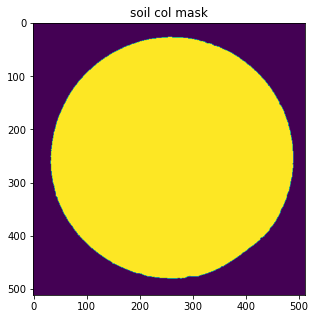

min_size_coef   80000.0


C:\Users\richa\AppData\Local\Temp\ipykernel_20364\710639136.py:125: UserWarning: G:\SOIL_UCT\OUT_PORE\recon_BALDY_D_S1_R1.tif\recon_BALDY_D_S1_R1.tif_root_sml_obj.tif is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  skimage.io.imsave(out+IMAGE_ID+"_"+"root_sml_obj.tif", (root_sml_obj))
C:\Users\richa\AppData\Local\Temp\ipykernel_20364\710639136.py:125: UserWarning: G:\SOIL_UCT\OUT_PORE\recon_BALDY_D_S1_R1.tif\recon_BALDY_D_S1_R1.tif_root_sml_obj.tif is a low contrast image
  skimage.io.imsave(out+IMAGE_ID+"_"+"root_sml_obj.tif", (root_sml_obj))


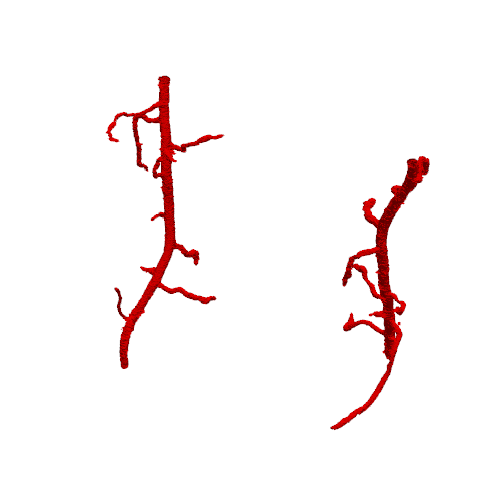

Calculating Distance Map For Image
D_euc processing time: 27.3 s
the breakdown of touching vs not touching
Not Touching Air    0.780613
Touching Air        0.219387
Name: touching, dtype: float64
31
 randomwalk time 14.0 s


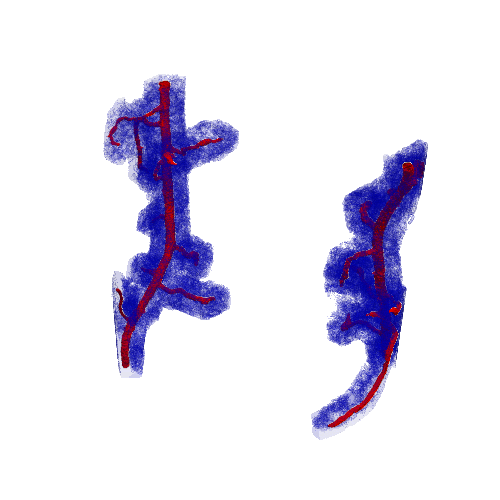

0it [00:00, ?it/s]

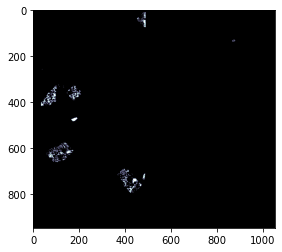

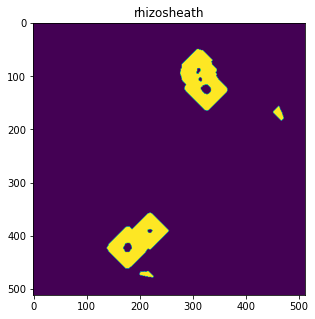

C:\Users\richa\AppData\Local\Temp\ipykernel_20364\710639136.py:290: UserWarning: G:\SOIL_UCT\OUT_PORE\recon_BALDY_D_S1_R1.tif\recon_BALDY_D_S1_R1.tif_31pore_regions.tif is a low contrast image
  skimage.io.imsave(out+IMAGE_ID+"_"+i_step_str+"pore_regions.tif", (regions))


Extracting pore and throat properties:   0%|          | 0/2802 [00:00<?, ?it/s]

KeyError: 'throat.throat.perimeter'

In [14]:
for folder_x in post_ai_folder_paths:
    gc.collect()
    print (folder_x)
    IMAGE_ID = folder_x.replace(post_ai_folder_path_name, "")
    IMAGE_ID = IMAGE_ID.replace('\\', '')
    print (IMAGE_ID)
    output_directory = output_base+IMAGE_ID+"\\"
    if os.path.isdir(output_directory):
        out=(output_directory)
    else:
        os.mkdir(output_directory)
        out=output_directory
    os.chdir(out)   
    #Materials
    plastic_path="plastic\\"
    root_path="root\\"
    background_path="background\\"
    pore_path="soil\\" #obviously this is dumb
    soil_path="pore\\" #obviously this is dumb
    #
    path=folder_x
    ##################################
    ext="*.png"
    
    #Need to extract a mask for the soil column #USES PLASTIC TO GET SOIL COL
    
    plastic = []
    for filename in sorted(glob(path+plastic_path+ext), key=os.path.getmtime):
        slice_n=skimage.io.imread(filename)
        slice_n_t=scipy.ndimage.binary_fill_holes(slice_n)
        slic_n_col=slice_n - slice_n_t
        slic_n_col = (slic_n_col == 255).astype(np.uint8)
        plastic.append(slic_n_col)
    plastic = np.array(plastic, dtype='ubyte')
    print(np.shape(plastic))
    plastic_sml=zoom(plastic, (scale_factor,scale_factor, scale_factor), order=0)
    print(np.shape(plastic_sml))
   
    plt.figure(figsize= (5,5));
    plt.imshow(plastic_sml[50]);
    plt.title("soil col mask");
    plt.show();
    
    del plastic 
    gc.collect()
    
    #plastic_sml_obj = remove_small_objects(plastic_sml, min_size=170000, connectivity=2)
    
    #plastic_VOL = Volume(plastic_sml, spacing=((Z),(Y),(X)))
    #plastic_ISO = plastic_VOL.isosurface(1)
    #plastic_ISO.write(out+IMAGE_ID+"__plastic.stl")
    
#     ##########################
#     background = []
#     for filename in sorted(glob(path+background_path+ext), key=os.path.getmtime):
#         slice_n=skimage.io.imread(filename)
#         background.append(slice_n)
#     background = np.array(plastic, dtype='ubyte')
#     background_sml=zoom(background, (scale_factor,scale_factor, scale_factor), order=0)
#     del background 
#     gc.collect()
#     #############################################################
    pore = []
    for filename in sorted(glob(path+pore_path+ext), key=os.path.getmtime):
        slice_n=skimage.io.imread(filename)
        pore.append(slice_n)
    pore = np.array(pore, dtype='ubyte')
    pore_sml=zoom(pore, (scale_factor,scale_factor, scale_factor), order=0)
    del pore 
    gc.collect()
    
#     soil = []
#     for filename in sorted(glob(path+soil_path+ext), key=os.path.getmtime):
#         slice_n=skimage.io.imread(filename)
#         soil.append(slice_n)
#     soil = np.array(soil, dtype='ubyte')
#     soil_sml=zoom(soil, (scale_factor,scale_factor, scale_factor), order=0)
#     del soil 
#     gc.collect()
    
#     ####### create a block out area  to limit rhizosheath 
#     block_out=plastic_sml_obj+background_sml
#     block_out[block_out!= 0]=1
    
    gc.collect()
    
    ## Do some root editing  
    root = []
    for filename in sorted(glob(path+root_path+ext), key=os.path.getmtime):
        slice_n=skimage.io.imread(filename)
        slice_n=scipy.ndimage.binary_dilation(slice_n)
        slice_n=scipy.ndimage.binary_dilation(slice_n)
        slice_n=scipy.ndimage.binary_fill_holes(slice_n)
        slice_n=scipy.ndimage.binary_erosion(slice_n)
        slice_n=scipy.ndimage.binary_erosion(slice_n)
        slice_n=scipy.ndimage.binary_fill_holes(slice_n)
        root.append(slice_n)
    root = np.array(root, dtype='ubyte')
    
    root_sml=zoom(root, (scale_factor,scale_factor, scale_factor), order=0)
    del root 
    gc.collect()
    root_sml=label(root_sml)
    min_size_coef=400000*scale_factor
    print("min_size_coef   "+str(min_size_coef))
    
    root_sml_obj = remove_small_objects(root_sml, min_size=min_size_coef, connectivity=2)
    
    #Root Volume
    Root_INFO = skimage.measure.regionprops_table(root_sml_obj, properties = ('label','area'))
    Root_INFO=pd.DataFrame(Root_INFO)
    Root_INFO.columns = ['Label', 'Area_Pixels']
    Root_INFO['Root_Volume_Voxel_Resolved'] = Root_INFO['Area_Pixels'].astype(np.int64) * X *Y*Z
    
    Root_INFO.to_csv(out+IMAGE_ID+"_"+"Root_INFO.csv") 
    
    root_sml_obj = (root_sml_obj != 0).astype(bool)

    
    #root_VOL = Volume(zoom(root_binary_small_obj_remove, (0.5,0.5, 0.5), order=0), spacing=((Z*2),(Y*2),(X*2)))
    root_VOL = Volume(root_sml_obj, spacing=((Z),(Y),(X)))
    #root_VOL = Volume(root, spacing=(Z,Y,X))
    root_ISO = root_VOL.isosurface(1)
    root_ISO.write(out+IMAGE_ID+"__root.stl")
    skimage.io.imsave(out+IMAGE_ID+"_"+"root_sml_obj.tif", (root_sml_obj))
    
    #Root stl for pore network vis
    root_VOL = Volume((np.swapaxes(root_sml_obj, 2, 0)), spacing=((Z),(Y),(X)))
    #root_VOL = Volume(root, spacing=(Z,Y,X))
    root_ISO = root_VOL.isosurface(1)
    root_ISO.write(out+IMAGE_ID+"__root_for_pore_vis.stl")
    
    
#     #create soil solumn - this is needed so there is no rhizosheath in the pot of background when calculating porosity
#     soil_col=((root_sml_obj+pore_sml+soil_sml).astype(bool))
#     soil_col=scipy.ndimage.binary_fill_holes(soil_col)
#     plt.imshow(soil_col[50])
#     tube_background=invert((soil_col).astype(bool))
    

    
    #plastic_STL=pv.read(out+IMAGE_ID+"__plastic.stl")
    root_STL=pv.read(out+IMAGE_ID+"__root.stl")
    
    pv.set_plot_theme("document")
    p = pv.Plotter()
    p.set_background("white")
    p.add_mesh(root_STL, color="red")
    #p.add_mesh(plastic_STL, color="grey", opacity=0.1);
    p.window_size = 500, 500
    p.show(jupyter_backend='static');
    #p.screenshot(output_base+"images\\"+IMAGE_ID+'__3D_model.png') ;
    p.screenshot(out+IMAGE_ID+'__3D_model.png') ;
    
    #Calculate Distance from root surface to pore or soil
    
#    soil = []
#     for filename in sorted(glob(path+soil_path+ext), key=os.path.getmtime):
#         slice_n=skimage.io.imread(filename)
#         soil.append(slice_n)
#     soil = np.array(soil, dtype='ubyte')
#     soil_sml=zoom(soil, (scale_factor,scale_factor, scale_factor), order=0)
#     del soil 
#     gc.collect()
    
    #Extract the "edge"/"surface" of the root
    root_erosion = Erosion3DimJ(root_sml_obj)
    root__edge = root_sml_obj ^ root_erosion
    ############################################################################################
    #Calculate the distance from the pores to the nearest root surface
    voxel_dims = [Z,Y,X] #um
    print("Calculating Distance Map For Image")
    t0 = time.time()
    D_euc_pore = np.ma.masked_array(distance_transform_edt(invert((pore_sml != 0)), sampling=voxel_dims), 
                               dtype="float32")
    print('D_euc processing time:',str(np.round((time.time()-t0), 1)),'s')

    #Calculatethe distance from air at the edge of the root
    air_near_root_stack = D_euc_pore * root_sml_obj.astype(float)
    air_near_root_stack = air_near_root_stack.astype(np.float32)
    data = np.array(air_near_root_stack)
    data=data.flatten()
    data=data[data != 0] #We drop 0's because that is observations not on the cell surface)
    min_distance= data.min()
    data =pd.DataFrame(data)
    data.columns = ['Distance']
    data["ID"]=IMAGE_ID
    data.to_csv(out+IMAGE_ID+"distance_root_to_air.csv")
    data['touching'] = np.where(data['Distance']!= min_distance, "Not Touching Air", "Touching Air") 
    print("the breakdown of touching vs not touching")
    print(data['touching'].value_counts(normalize=True))
    
    #reduce raw data accorgndly 
    

    
    
    for i_step in distance_steps:
        print (str(i_step)) 
        i_step_str=str(i_step)
    #Dilate to make a "rhizosphere" mask
        diamond = ndi.generate_binary_structure(rank=3, connectivity=1)
        iternation_n=i_step
        dilated = ndi.binary_dilation(root_sml_obj, diamond, iterations=iternation_n)
        #dilated=dilated ^ tube_background
        #Seperate the roots from dilated image
        rhizosheath= root_sml_obj ^ dilated
        rhizosheath=rhizosheath*plastic_sml
        #
        #Rhizosheath Volume
        Rhizosheath_INFO = skimage.measure.regionprops_table(rhizosheath, properties = ('label','area'))
        Rhizosheath_INFO=pd.DataFrame(Rhizosheath_INFO)
        Rhizosheath_INFO.columns = ['Label', 'Area_Pixels']
        Rhizosheath_INFO['Rhizosheath_Volume_Voxel_Resolved'] = Rhizosheath_INFO['Area_Pixels'].astype(np.int64) * X *Y*Z

        Rhizosheath_INFO.to_csv(out+IMAGE_ID+"_"+i_step_str+"Rhizosheath_INFO.csv") 

        ###########################################################################################
        #Extract the pore network from the rhizosheath 
        im=pore_sml * rhizosheath
        skimage.io.imsave(out+IMAGE_ID+"_"+"PORE_RHIZO.tif", (im))
    
        
        #3D Tau
        rw = pt.RandomWalk(im);
        t0 = time.time();
        rw.run(nt=10000, nw=10000, same_start=False, stride=1, num_proc=10)
        #rw.plot_walk_2d(check_solid=True, data='t');
        #rw.plot_msd();
        t1 = time.time() - t0;
        print (' randomwalk time '+str(np.round(t1))+' s');
        rw_pd_df=capture_msd(rw)
        rw_pd_df.to_csv(out+IMAGE_ID+"_"+i_step_str+"rw_pd_df.csv") 
        rw.export_walk(image=None, path=out+IMAGE_ID, sub='data', prefix='rw_', sample=1)

        #Rhizosheath Pore volume
        PORE_rhizo_INFO = skimage.measure.regionprops_table(im, properties = ('label','area'))
        PORE_rhizo_INFO=pd.DataFrame(PORE_rhizo_INFO)
        PORE_rhizo_INFO.columns = ['Label', 'Area_Pixels']
        PORE_rhizo_INFO['PORE_rhizo_Volume_Voxel_Resolved'] = PORE_rhizo_INFO['Area_Pixels'].astype(np.int64) * X *Y*Z
        
        PORE_rhizo_INFO.to_csv(out+IMAGE_ID+"_"+i_step_str+"Rhizosheath_PORE_INFO.csv") 

        #VIS OF PORE RHIZO FOR SANITY CHECK
        #rhizo_VOL = Volume(zoom(im, (0.1,0.1, 0.1), order=0), spacing=((Z*10),(Y*10),(X*10)))
        rhizo_VOL = Volume(im, spacing=((Z),(Y),(X)))
        rhizo_ISO = rhizo_VOL.isosurface(1)
        rhizo_ISO.write(out+IMAGE_ID+"_"+i_step_str+"__pore_rhizo.stl")
        ##############################
        rhizo_STL=pv.read(out+IMAGE_ID+"_"+i_step_str+"__pore_rhizo.stl")
        root_STL=pv.read(out+IMAGE_ID+"__root.stl")

        pv.set_plot_theme("document")
        p = pv.Plotter()
        p.set_background("white")
        p.add_mesh(root_STL, color="red")
        p.add_mesh(rhizo_STL, color="blue", opacity=0.1);
        p.window_size = 500, 500
        p.show(jupyter_backend='static');
        p.screenshot(out+IMAGE_ID+"_"+i_step_str+'__3D_pore_rhizo.png') ;
    
        ##############################
        im=pore_sml * rhizosheath
        im = (im != 0).astype(bool)
        ###########################
        fig, ax = plt.subplots()
        ax.imshow(ps.visualization.show_planes(im), cmap=plt.cm.bone);
        
        
        ###############
        sigma = 0.4
        dt = spim.distance_transform_edt(input=im)
        dt1 = spim.gaussian_filter(input=dt, sigma=sigma)
        peaks = find_peaks(dt=dt)
        #print('Initial number of peaks: ', spim.label(peaks)[1])
        peaks = trim_saddle_points(peaks=peaks, dt=dt1)
        #print('Peaks after trimming saddle points: ', spim.label(peaks)[1])
        peaks = trim_nearby_peaks(peaks=peaks, dt=dt)
        peaks, N = spim.label(peaks)
        #print('Peaks after trimming nearby peaks: ', N)
        regions = watershed(image=-dt, markers=peaks, mask=dt > 0)
        regions = randomize_colors(regions)
        ############################
        mat_slice=int(len(rhizosheath)/2)
        plt.figure(figsize= (5,5));
        plt.imshow(rhizosheath[mat_slice]);
        plt.title("rhizosheath");
        plt.show();
        #############################
        skimage.io.imsave(out+IMAGE_ID+"_"+i_step_str+"pore_regions.tif", (regions))
        #
        
        net = ps.networks.regions_to_network(regions*im, voxel_size=X)
        pn = op.io.network_from_porespy(net)

        pore_region_volume_df=pd.DataFrame(pn['pore.region_volume'])
        #print('number of regions')
        #print(len(pore_regchaion_volume_df))

        throat_cons_df=pd.DataFrame(pn['throat.conns'])
        
    
        #print('number of connections between regions')
        #print(len(throat_cons_df))
        throat_cons_df.to_csv(out+IMAGE_ID+"_"+i_step_str+"_throat_cons_df.csv") 
        pore_region_volume_df.to_csv(out+IMAGE_ID+"_"+i_step_str+"_pore_region_volume_df.csv") 
        
        throat_total_length_df=pd.DataFrame(pn['throat.total_length'])
        throat_total_length_df.to_csv(out+IMAGE_ID+"_"+i_step_str+"_throat_total_length_df.csv") 
        
        throat_direct_length_df=pd.DataFrame(pn['throat.direct_length'])
        throat_direct_length_df.to_csv(out+IMAGE_ID+"_"+i_step_str+"_throat_direct_length_df.csv") 
        
        throat_perimeter_df=pd.DataFrame(pn['throat.perimeter'])
        throat_perimeter.to_csv(out+IMAGE_ID+"_"+i_step_str+"_throat_perimeter_df.csv") 
        
        throat_inscribed_diameter_df=pd.DataFrame(pn['throat.inscribed_diameter'])
        throat_inscribed_diameter_df.to_csv(out+IMAGE_ID+"_"+i_step_str+"_throat_inscribed_diameter_df.csv") 
        
       
        
        pore_surface_area_df=pd.DataFrame(pn['pore.surface_area'])
        pore_surface_area_df.to_csv(out+IMAGE_ID+"_"+i_step_str+"pore.surface_area_df.csv")
        
        
        #im = ps.tools.align_image_with_openpnm(im) ### THIS DOESNT WORK!!!
        im = (np.swapaxes(im, 2, 0)) # This isjust some of ps.tools.align_image_with_openpnm(im), it works to align image with
        #network
        imageio.volsave(out+IMAGE_ID+'image_ps_for_pview.tif', np.array(im, dtype=np.int8))
        op.io.project_to_vtk(project=pn.project,filename=(out+IMAGE_ID+"network"))
        
        if i_step == np.min(distance_steps):
            print("First rhizo ring - vis proportion of root touching air") 
            dist_tree = KDTree(rhizo_STL.points)
            distance_df, idx = dist_tree.query(root_STL.points )
            root_STL["Distance (um)"] = distance_df
            
            boring_cmap = plt.cm.get_cmap("jet", 50)
        
            pv.set_plot_theme("document")
            p = pv.Plotter()
            p.set_background("white")
            p.add_mesh(root_STL, scalars="Distance (um)", cmap=boring_cmap)
            #p.add_mesh(pore_STL, color="blue", opacity=0.3);
            p.window_size = 500, 500
            p.show(jupyter_backend='static');
            p.screenshot(out+IMAGE_ID+'__3D_DISTANCE.png') ; 
            
            rhizo_cover=root_STL.copy()  
            rhizo_cover_dist = rhizo_cover["Distance (um)"]
            rhizo_cover_dist[rhizo_cover_dist==(X)] = 1  
            rhizo_cover_dist[rhizo_cover_dist>(X)] = 2
            rhizo_cover["Touching Soil or Not"] = rhizo_cover_dist 

            pv.set_plot_theme("document")
            p = pv.Plotter()
            p.set_background("white")
            p.add_mesh(rhizo_cover,scalars="Touching Soil or Not")
            p.remove_scalar_bar()
            p.window_size = 500, 500
            p.show(jupyter_backend='static')
            p.screenshot(out+IMAGE_ID+'__touching_or_not.png') ; 
            
        else:
            ("print root distance images already created")

        if i_step == np.max(distance_steps):
            print ("calculating bulk soil")
            bulk_soil = invert((root_sml_obj + dilated).astype(bool))
            bulk_soil=bulk_soil * plastic_sml
            
            plt.figure(figsize= (5,5));
            plt.imshow(bulk_soil[50]);
            plt.title("bulk_soil total area");
            plt.show();
            
            #####bulk soil Volume ### need to lock 
            Rhizosheath_INFO = skimage.measure.regionprops_table(bulk_soil, properties = ('label','area'))
            Rhizosheath_INFO=pd.DataFrame(Rhizosheath_INFO)
            Rhizosheath_INFO.columns = ['Label', 'Area_Pixels']
            Rhizosheath_INFO['Rhizosheath_Volume_Voxel_Resolved'] = Rhizosheath_INFO['Area_Pixels'].astype(np.int64) * X *Y*Z

            Rhizosheath_INFO.to_csv(out+IMAGE_ID+"_"+"bulk_soil__INFO.csv") 
            bulk_soil=pore_sml * bulk_soil
           ####################TAU 
            rw = pt.RandomWalk(bulk_soil);
            t0 = time.time();
            rw.run(nt=10000, nw=10000, same_start=False, stride=1, num_proc=10)
            #rw.plot_walk_2d(check_solid=True, data='t');
            rw.plot_msd();
            t1 = time.time() - t0;
            print (' randomwalk time '+str(np.round(t1))+' s');
            rw_pd_df=capture_msd(rw)
            rw_pd_df.to_csv(out+IMAGE_ID+"_"+"bulk_soil"+"rw_pd_df.csv") 

          ################################################  

            ###########################################################################################
            #Extract the pore network from the rhizosheath 
            
            #Rhizosheath Pore volume
            PORE_rhizo_INFO = skimage.measure.regionprops_table(bulk_soil, properties = ('label','area'))
            PORE_rhizo_INFO=pd.DataFrame(PORE_rhizo_INFO)
            PORE_rhizo_INFO.columns = ['Label', 'Area_Pixels']
            PORE_rhizo_INFO['PORE_rhizo_Volume_Voxel_Resolved'] = PORE_rhizo_INFO['Area_Pixels'].astype(np.int64) * X *Y*Z

            PORE_rhizo_INFO.to_csv(out+IMAGE_ID+"_"+"bulk_soil__PORE_INFO.csv") 
            
            #########
            bulk_soil = (bulk_soil != 0).astype(bool)
            ########
                                  
        
            dt = spim.distance_transform_edt(input=bulk_soil)
            dt1 = spim.gaussian_filter(input=dt, sigma=sigma)
            peaks = find_peaks(dt=dt)
            #print('Initial number of peaks: ', spim.label(peaks)[1])
            peaks = trim_saddle_points(peaks=peaks, dt=dt1)
            #print('Peaks after trimming saddle points: ', spim.label(peaks)[1])
            peaks = trim_nearby_peaks(peaks=peaks, dt=dt)
            peaks, N = spim.label(peaks)
            #print('Peaks after trimming nearby peaks: ', N)
            regions = watershed(image=-dt, markers=peaks, mask=dt > 0)
            regions = randomize_colors(regions)
            
            ################################
            plt.figure(figsize= (5,5));
            plt.imshow(bulk_soil[mat_slice]);
            plt.title("bulk_soil_pores");
            plt.show();
            ################################
            #skimage.io.imsave(out+IMAGE_ID+"_"+'bulk_soil'+"pore_regions.tif", (regions))
            
            rhizo_VOL = Volume(zoom(bulk_soil, (0.1,0.1, 0.1), order=0), spacing=((Z*10),(Y*10),(X*10)))
            rhizo_VOL = Volume(bulk_soil, spacing=((Z),(Y),(X)))
            rhizo_ISO = rhizo_VOL.isosurface(1)
            rhizo_ISO.write(out+IMAGE_ID+"_"+"__pore_bulk_soil.stl")

            rhizo_STL=pv.read(out+IMAGE_ID+"_"+"__pore_bulk_soil.stl")
            root_STL=pv.read(out+IMAGE_ID+"__root.stl")

#             pv.set_plot_theme("document")
#             p = pv.Plotter()
#             p.set_background("white")
#             p.add_mesh(root_STL, color="red")
#             p.add_mesh(rhizo_STL, color="purple", opacity=0.1);
#             p.window_size = 500, 500
#             p.show(jupyter_backend='static');
#             p.screenshot(out+IMAGE_ID+"_"+"bulk_soil_"+'__3D_pore_rhizo.png') ;


            net = ps.networks.regions_to_network(regions*bulk_soil, voxel_size=X)
            pn = op.io.network_from_porespy(net)

            pore_region_volume_df=pd.DataFrame(pn['pore.region_volume'])
            #print('number of regions')
            #print(len(pore_regchaion_volume_df))

            throat_cons_df=pd.DataFrame(pn['throat.conns'])
            #print('number of connections between regions')
            #print(len(throat_cons_df))
            throat_cons_df.to_csv(out+IMAGE_ID+"_"+'bulk_soil'+"_throat_cons_df.csv") 
            pore_region_volume_df.to_csv(out+IMAGE_ID+"_"+'bulk_soil'+"_pore_region_volume_df.csv") 
            
            throat_length_df=pd.DataFrame(pn['throat.total_length'])
            throat_length_df.to_csv(out+IMAGE_ID+"_"+'bulk_soil'+"throat_length_df.csv") 

            pore_surface_area_df=pd.DataFrame(pn['pore.surface_area'])
            pore_surface_area_df.to_csv(out+IMAGE_ID+"_"+'bulk_soil'+"pore.surface_area_df.csv")
        
            
            
            
        else:
            print ("more rhizo rings to do, dont do bulk soil yet")
            
    
    del root_sml
    del root_sml_obj
    del root_STL
    #del plastic_STL
    #del plastic_VOL
    #del plastic_ISO
    del root_VOL
    del root_ISO
    gc.collect()

In [ ]:
#print(inspect.getsource(ps.tools.align_image_with_openpnm))

In [ ]:
#Create movie from base_path (search folders)
import os
from glob import glob
import moviepy.video.io.ImageSequenceClip

output_base = "G:\\SOIL_UCT\\OUT_PORE\\"
fps=1

image_files = [y for x in os.walk(output_base) for y in glob(os.path.join(x[0], '*.png'))]
image_files = [word for word in image_files if '31' in word]
clip = moviepy.video.io.ImageSequenceClip.ImageSequenceClip(image_files, fps=fps)
clip.write_videofile(output_base+'pore_newtork_test.mp4')

In [ ]:
#Create movie from base_path (search folders)
import os
from glob import glob
import moviepy.video.io.ImageSequenceClip

output_base = "G:\\SOIL_UCT\\OUT_PORE\\"
fps=1

image_files = [y for x in os.walk(output_base) for y in glob(os.path.join(x[0], '*.png'))]
image_files = [word for word in image_files if 'DISTANCE' in word]
clip = moviepy.video.io.ImageSequenceClip.ImageSequenceClip(image_files, fps=fps)
clip.write_videofile(output_base+'DISTANCE.mp4')

In [ ]:
#Create movie from base_path (search folders)
import os
from glob import glob
import moviepy.video.io.ImageSequenceClip

output_base = "G:\\SOIL_UCT\\OUT_PORE\\"
fps=1

image_files = [y for x in os.walk(output_base) for y in glob(os.path.join(x[0], '*.png'))]
image_files = [word for word in image_files if 'touching' in word]
clip = moviepy.video.io.ImageSequenceClip.ImageSequenceClip(image_files, fps=fps)
clip.write_videofile(output_base+'touching.mp4')

In [ ]:
#The tortuosity is extracted by the inverse of the slope of the mean square displacement which is calculated with linear regression forcing the intercept through zero. 